<a href="https://colab.research.google.com/github/rayane2907/Algorithms_in_AI/blob/main/Perceptron_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Perceptron Algorithm**



In [ ]:
import numpy
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

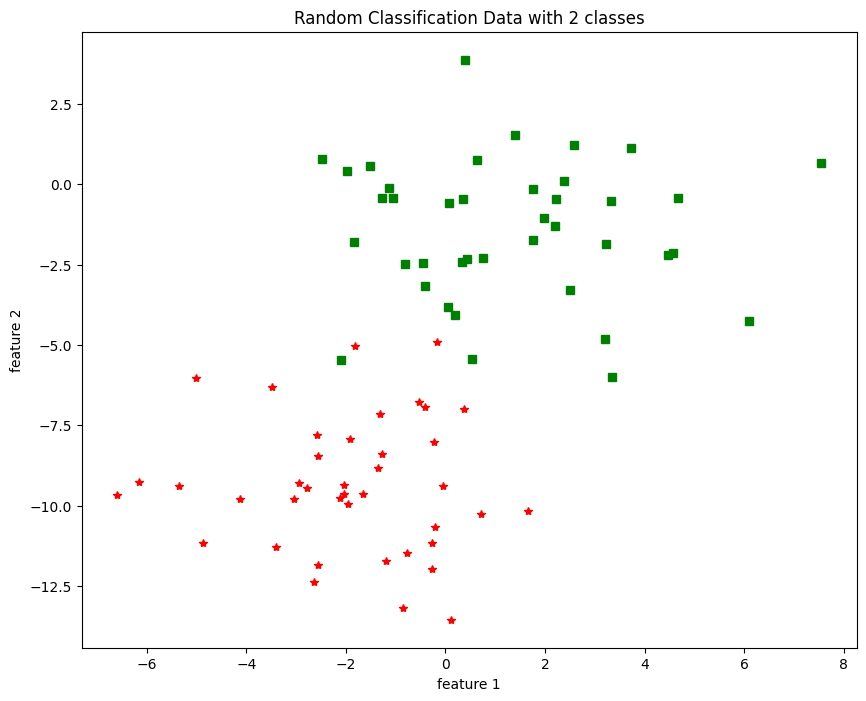

In [ ]:
# Creatin the data set
X, y = datasets.make_blobs(n_samples=80,n_features=2,
                           centers=2,cluster_std=2,
                           random_state=2)
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r*')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'gs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

In [ ]:
# defining the step function
def step_func(z):
        return 1.0 if (z > 0) else 0.0

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def perceptron(X, y, lr, epochs):                 # lr is the learning rate

    # m-> number of training examples
    # n-> number of features
    m, n = X.shape
    theta = np.zeros((n+1,1)) # 1 in n+1 because of the bias at w0
    n_miss_list = []
    for epoch in range(epochs):
        n_miss = 0                 #misclassified variable to store
        for idx, x_i in enumerate(X):
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            # Calculating prediction/hypothesis.
            y_hat = step_func(np.dot(x_i.T, theta))
            # Updating if the chosen example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += lr*((y[idx] - y_hat)*x_i)
                n_miss += 1
        n_miss_list.append(n_miss)
    return theta, n_miss_list

def plot_decision_boundary(X, theta):

    # The Line is y=mx+c. So, Equate mx+c = theta0.X0 + theta1.X1 + theta2.X2
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c

    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r*")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "gs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Perceptron Algorithm')
    plt.plot(x1, x2, 'y-')

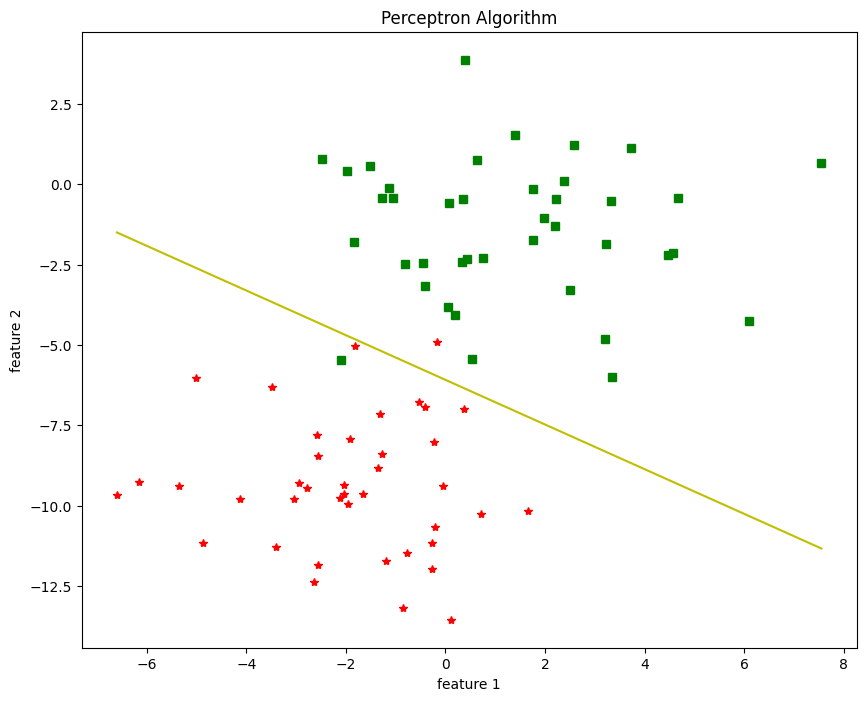

In [ ]:
#the result of segmoid function
theta, miss_l = perceptron(X, y, 0.1, 100)
plot_decision_boundary(X, theta)

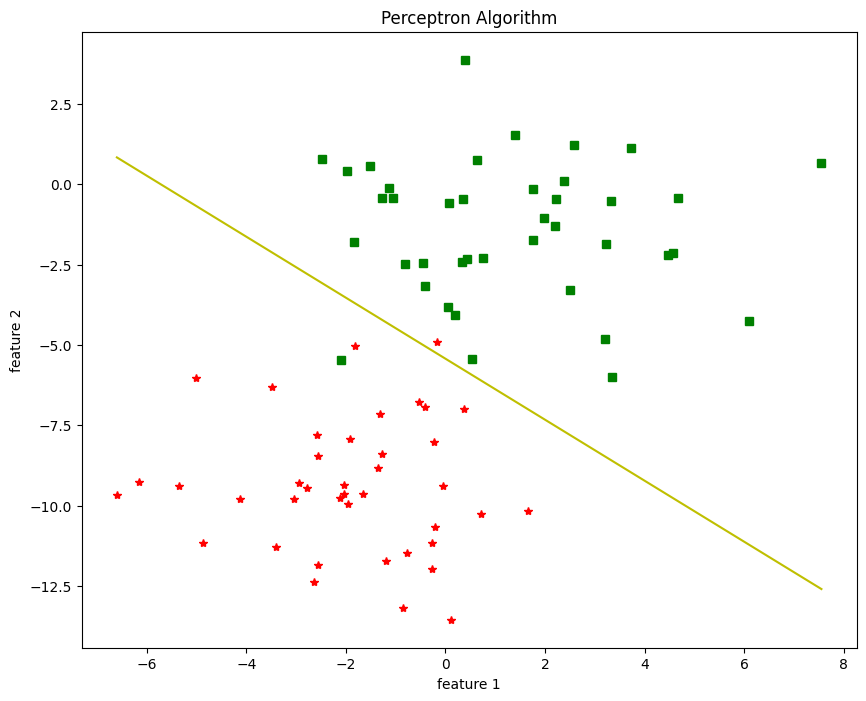

In [ ]:
# the result of the step function
theta, miss_l = perceptron(X, y, 0.1, 100)
plot_decision_boundary(X, theta)